                                         names       date_x  score  \
0                                    Creed III  03/02/2023    73.0   
1                     Avatar: The Way of Water  12/15/2022    78.0   
2                  The Super Mario Bros. Movie  04/05/2023    76.0   
3                                      Mummies  01/05/2023    70.0   
4                                    Supercell  03/17/2023    61.0   
...                                        ...          ...    ...   
10173                       20th Century Women  12/28/2016    73.0   
10174  Delta Force 2: The Colombian Connection  08/24/1990    54.0   
10175                         The Russia House  12/21/1990    61.0   
10176         Darkman II: The Return of Durant  07/11/1995    55.0   
10177       The Swan Princess: A Royal Wedding  07/20/2020    70.0   

                                                   genre            orig_lang  \
0                                          Drama, Action              English 

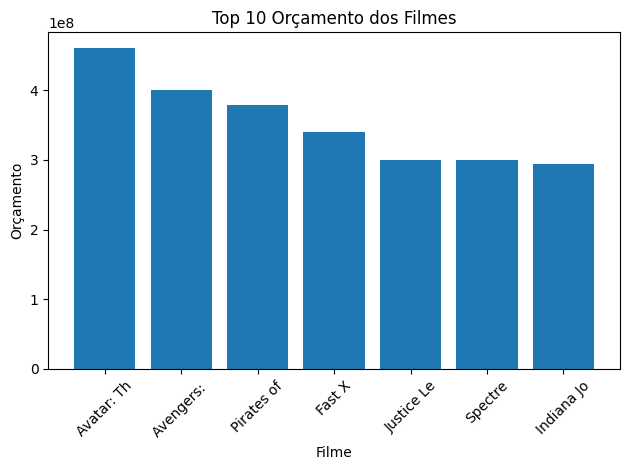

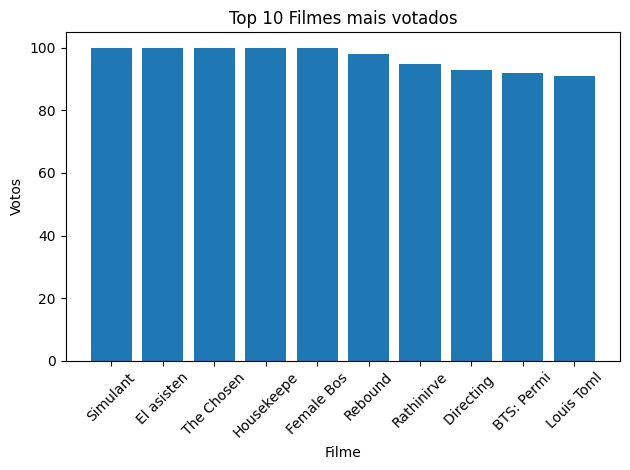

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo = 'imdb_movies.csv'

# Define a variável do arquivo
conteudo = pd.read_csv(arquivo)

# Refina o dataframe
df = pd.DataFrame(conteudo)
df = df.drop('overview', axis=1)
df = df.drop('revenue', axis=1)
df = df.drop('status', axis=1)
df = df.drop('orig_title', axis=1)
df = df.drop('crew', axis=1)

palavras_chave_eroticas = ['hentai', 'orgasm', 'porno', 'pretty young']

for palavra_chave in palavras_chave_eroticas:
    df = df[~df['names'].str.contains(palavra_chave, case=False)]

# Variaveis para análise dos dados
filme_maior_orçamento_ind = df['budget_x'].idxmax()
filme_mais_votado_ind = df['score'].idxmax()
filme_mais_votado= df.loc[filme_mais_votado_ind, 'names']
nome_filme_maior_orcamento = df.loc[filme_maior_orçamento_ind, 'names']
orcamento_filme_maior_orcamento = df.loc[filme_maior_orçamento_ind, 'budget_x']

# Cria outro arquivo csv sendo ele refinado
df.to_csv('movies_refined.csv', index=False)

# Prints
print(df)
print('O filme mais votado é:', filme_mais_votado)
print("O filme com o maior orçamento é:", nome_filme_maior_orcamento)
print("Valor do orçamento:", orcamento_filme_maior_orcamento)

df['names'] = df['names'].str.slice(0, 10)

top_10_filmes_orcamento = df.sort_values(by='budget_x', ascending=False).head(10)

plt.bar(top_10_filmes_orcamento['names'], top_10_filmes_orcamento['budget_x'])

plt.title('Top 10 Orçamento dos Filmes')
plt.xlabel('Filme')
plt.ylabel('Orçamento')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

top_10_filmes_votos = df.sort_values(by='score', ascending=False).head(10)

plt.bar(top_10_filmes_votos['names'], top_10_filmes_votos['score'])

plt.title('Top 10 Filmes mais votados')
plt.xlabel('Filme')
plt.ylabel('Votos')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()